### Python Version and server connection

In [277]:
import sys
print(sys.version)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


### Working Location

In [278]:
import os
os.chdir("C:\\Users\Shiva\Documents\TTU Mods\Leetcode")
print(os.getcwd())
print(os.listdir())

c:\Users\Shiva\Documents\TTU Mods\LeetCode
['apply.ipynb', 'atoi.py', 'binaryConvert.py', 'chipotle.tsv.txt', 'dacMergeSort.py', 'dictVsListVsEnumList.py', 'EDA_housing.ipynb', 'filter.ipynb', 'findMedianSortedArrays.py', 'housing.csv', 'karatsubaMultiply.py', 'lengthOfLongestSubstring.py', 'longestPalindrome.py', 'map.ipynb', 'neuralnet.ipynb', 'neuralnets.py', 'NPHard.py', 'regex.ipynb', 'reverseInteger.py', 'test.py', 'test1.ipynb', 'test1.py', 'test3.xlsx', 'Text Generation.ipynb', 'top_25_pandas_tricks.ipynb', 'twoSum_2.py', 'twoSum_args.py', 'twoSum_call.py', 'twoSum_delitem.py', 'twoSum_getitem.py', 'twoSum_hash.py', 'twoSum_init.py', 'twoSum_method2.py', 'twoSum_setitem.py', 'twoSum_setitem_2.py', 'twoSum_str.py', 'vehicles.csv', 'vehicles.csv.zip', 'Vehicle_EDA_V1.ipynb', 'zigZag.py', '__pycache__']


### Libraries

In [279]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Read

In [280]:
# Read excel file
idf = pd.read_csv("vehicles.csv", header = 0, index_col= None)

C:\Users\Shiva\.conda\envs\nlp_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Inspect dataframe

In [281]:
(len(idf.index),
len(idf.columns))
# 83 columns is too many -> see the types of columns

(41144, 83)

Preserving original dataframe and Col name cleanup and 

In [282]:
def start_pipeline(idf):
    df_1 = pd.DataFrame(idf).copy()
    return df_1

def clean_col_names(df_1):
    df_1 = pd.DataFrame(df_1)
    df_1.columns = df_1.columns.str.replace(' ', '_')
    return df_1

In [283]:
missing_data_tuning_param = 0.30
low_cardinality_tuning_param = 0.75
high_cardinality_tuning_param = 0.10

Filter on Missing data

In [284]:
df_1 = (idf
.pipe(start_pipeline)
.pipe(clean_col_names)
)


In [285]:
df_1.select_dtypes('O').columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [286]:
def change_dtypes(df, col_list, type):
    df = pd.DataFrame(df)
    print(col_list)
    for col in col_list:
        df.loc[:,col] = df.loc[:,col].astype(type)
    return df

In [287]:
df_1 = change_dtypes(df_1, df_1.select_dtypes('O').columns, 'category')

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')


In [288]:
df_1.select_dtypes('category').columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [289]:
def count_missing_data(df_1):
    df_1 = pd.DataFrame(df_1)
    
    df_2 = df_1.isnull().sum().sort_values(ascending= False)
    df_2 = pd.DataFrame(df_2.reset_index())
    df_2.columns.values[0] = 'feature'
    df_2.columns.values[1] = 'null_counts'
    # df_2.rename(columns= {'index': 'col_name', 0: 'null_count'}, inplace=True)
    df_2['sum_null_counts'] = df_2['null_counts']/len(df_1.index)
    # print(df_2[df_2['sum_null_counts'] > 0.45])
    
    
    return df_2[df_2['sum_null_counts'] > missing_data_tuning_param]['feature']

def append_missing_data_list(df_1):
    df_1 = pd.DataFrame(df_1)
    drop_feature = count_missing_data(df_1)
    df_1.drop(columns=drop_feature, inplace= True)
    return df_1

In [290]:
df_1 = append_missing_data_list(df_1) 

Filter on Cardinality

In [291]:
def low_cardinality(df_1, col_num):
    df_1 = pd.DataFrame(df_1)
    df_2 =(df_1.iloc[:,col_num].value_counts().reset_index())
    df_2.columns.values[0] = 'feature'
    df_2.columns.values[1] = 'counts'
    # df_2.rename(columns= {0:'feature', 1:'counts'}, inplace = True
    df_2['sum_counts'] = df_2['counts']/df_2['counts'].sum()
    return df_2[df_2['sum_counts']>low_cardinality_tuning_param].empty # more than ## remove


def append_low_cardinality_list(df_1):
    df_1 = pd.DataFrame(df_1)
    bool_vec = []
    col_list = df_1.select_dtypes('category').columns
    cat_col_num = [df_1.columns.get_loc(cat_col) for cat_col in df_1.select_dtypes('category').columns]
    for col_num in range(0, len(df_1.columns), 1):
        if col_num in cat_col_num:
            bool_vec.append(high_cardinality(df_1, col_num))
        else:
            bool_vec.append(True)
            # None
    return df_1.loc[:, bool_vec]

In [292]:
def high_cardinality(df_1, col_num):
    df_1 = pd.DataFrame(df_1)
    df_2 =(df_1.iloc[:,col_num].value_counts().reset_index())
    df_2.columns.values[0] = 'feature'
    df_2.columns.values[1] = 'counts'
    df_2['sum_counts'] = df_2['counts']/df_2['counts'].sum()

    return not df_2[df_2['sum_counts']>high_cardinality_tuning_param].empty # more than ## keep


def append_high_cardinality_list(df_1):
    df_1 = pd.DataFrame(df_1)
    bool_vec = []
    col_list = df_1.select_dtypes('category').columns
    cat_col_num = [df_1.columns.get_loc(cat_col) for cat_col in df_1.select_dtypes('category').columns]
    for col_num in range(0, len(df_1.columns), 1):
        if col_num in cat_col_num:
            bool_vec.append(high_cardinality(df_1, col_num))
        else:
            bool_vec.append(True)
            # None
    return df_1.loc[:, bool_vec]

In [293]:
df_1.select_dtypes('category').columns

Index(['drive', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany',
       'VClass', 'createdOn', 'modifiedOn'],
      dtype='object')

In [294]:
df_1 = append_high_cardinality_list(df_1)
df_1 = append_low_cardinality_list(df_1)

In [295]:
df_1.select_dtypes('category').columns

Index(['drive', 'fuelType', 'fuelType1', 'mpgData', 'trany', 'VClass',
       'createdOn', 'modifiedOn'],
      dtype='object')

Filter on Dtypes

In [296]:
df_1.dtypes.value_counts()

float64     32
int64       27
bool         1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [297]:
len(df_1.columns)

68

In [298]:
df_1.select_dtypes(include = 'O').head()

""
0
1
2
3
4


In [299]:
df_1.select_dtypes(include = 'number').head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-2250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-11500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,0,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-11500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-5750,0.0,0,0,0


Combine on common feature name

In [300]:
def combine_similar_columns(df, col_name_from, col_name_to):
    df = pd.DataFrame(df)
    df[col_name_to] = df.loc[:, df.columns.str.contains(col_name_from)].sum(axis = 1)
    col_to_drop = df.columns[df.columns.str.contains(col_name_from)]
    
    df.drop(columns= col_to_drop, inplace=True)
    return df

In [301]:
df_1 = (df_1
# .pipe(combine_similar_columns,'comb', 'com')
# .pipe(combine_similar_columns, 'highway', 'high_way')
.pipe(combine_similar_columns, 'fuelType', 'fuel_type')
# .pipe(combine_similar_columns, 'fuelCost', 'fuel_cost')
.pipe(combine_similar_columns, 'city', 'cit_y')
)

FillNA

In [302]:
len(df_1)

41144

In [303]:
df_1.isna().sum()

barrels08     0
barrelsA08    0
charge120     0
charge240     0
co2           0
             ..
phevCity      0
phevHwy       0
phevComb      0
fuel_type     0
cit_y         0
Length: 61, dtype: int64

In [304]:
df_1.nunique()

barrels08      203
barrelsA08      77
charge120        1
charge240       33
co2            547
              ... 
phevCity        39
phevHwy         41
phevComb        41
fuel_type       14
cit_y         4261
Length: 61, dtype: int64

Find a simple suitable way to fill df_1['drive'] NA

In [305]:
df_1['drive_codes'] = df_1['drive'].astype('category').cat.codes

In [306]:
df_1.corr('pearson').loc['drive_codes', :]

barrels08          0.052077
barrelsA08         0.018519
charge120               NaN
charge240          0.004348
co2                0.011563
co2A               0.008729
co2TailpipeAGpm    0.019703
co2TailpipeGpm     0.057136
comb08            -0.043547
comb08U            0.012458
combA08            0.008834
combA08U           0.004993
combE             -0.018635
combinedCD         0.007735
combinedUF         0.004486
cylinders          0.155866
displ              0.142966
engId             -0.063765
feScore            0.001096
fuelCost08         0.101709
fuelCostA08        0.019320
ghgScore           0.001406
ghgScoreA          0.001133
highway08         -0.024008
highway08U         0.015916
highwayA08         0.010445
highwayA08U        0.005803
highwayCD          0.006970
highwayE          -0.018406
highwayUF          0.004593
hlv               -0.040942
hpv               -0.045451
id                -0.160727
lv2                0.023789
lv4               -0.070317
phevBlended       -0

In [307]:
df_1.corr('kendall').loc['drive_codes', :]

barrels08          0.067986
barrelsA08         0.010587
charge120               NaN
charge240          0.000405
co2               -0.022306
co2A               0.002605
co2TailpipeAGpm    0.012809
co2TailpipeGpm     0.070186
comb08            -0.073912
comb08U           -0.019183
combA08            0.009869
combA08U           0.006022
combE             -0.009028
combinedCD        -0.005089
combinedUF        -0.005743
cylinders          0.135892
displ              0.114819
engId             -0.016878
feScore           -0.022795
fuelCost08         0.088264
fuelCostA08        0.012358
ghgScore          -0.022656
ghgScoreA          0.003410
highway08         -0.045171
highway08U        -0.015221
highwayA08         0.009912
highwayA08U        0.006033
highwayCD         -0.004861
highwayE          -0.008985
highwayUF         -0.005741
hlv               -0.034026
hpv               -0.033594
id                -0.115085
lv2                0.057227
lv4               -0.044364
phevBlended       -0

In [308]:
df_1.corr('spearman').loc['drive_codes', :]

barrels08          0.086982
barrelsA08         0.011630
charge120               NaN
charge240          0.000458
co2               -0.022491
co2A               0.002857
co2TailpipeAGpm    0.014044
co2TailpipeGpm     0.090518
comb08            -0.095092
comb08U           -0.027053
combA08            0.011012
combA08U           0.006656
combE             -0.009876
combinedCD        -0.005579
combinedUF        -0.006320
cylinders          0.163449
displ              0.157258
engId             -0.023320
feScore           -0.029419
fuelCost08         0.117252
fuelCostA08        0.013548
ghgScore          -0.029263
ghgScoreA          0.003751
highway08         -0.057673
highway08U        -0.022707
highwayA08         0.011050
highwayA08U        0.006654
highwayCD         -0.005328
highwayE          -0.009845
highwayUF         -0.006317
hlv               -0.037475
hpv               -0.036794
id                -0.156354
lv2                0.066198
lv4               -0.050788
phevBlended       -0

In [309]:
df_1['drive'].describe()

count                 39955
unique                    7
top       Front-Wheel Drive
freq                  14236
Name: drive, dtype: object

In [310]:
df_1['drive_codes'].describe()

count    41144.000000
mean         3.981917
std          1.819135
min         -1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          6.000000
Name: drive_codes, dtype: float64

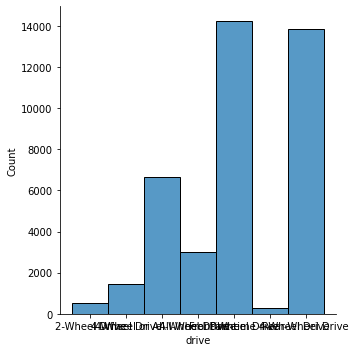

In [311]:
sns.displot(df_1['drive'])

FillNA with top 3 emissions from the feature

In [312]:
def get_p_from_distribution(df, col, n_largest):
    df = pd.DataFrame(df)
    p = df[col].value_counts().nlargest(n_largest)/ df[col].value_counts().nlargest(n_largest).sum()
    return p

In [313]:
def fillNA_with_p_dist(df, col, n_largest):
    p =  get_p_from_distribution(df, col, n_largest)
    arr = np.random.choice(p.index, df[col].isna().sum(), replace = True, p = p.values)
    arr = pd.Series(arr, index = df_1[df_1[col].isna() == True][col].index)
    return arr

In [314]:
df_1['drive'].fillna(value= fillNA_with_p_dist(df_1, 'drive', 3), inplace = True)
df_1['cylinders'].fillna(value=df_1['cylinders'].mode().loc[0], inplace= True)
df_1['trany'].fillna(value=df_1['trany'].mode().loc[0], inplace= True)
df_1['displ'].fillna(value=df_1['displ'].mode().loc[0], inplace= True)

In [315]:
df_1.isna().sum()

barrels08      0
barrelsA08     0
charge120      0
charge240      0
co2            0
              ..
phevHwy        0
phevComb       0
fuel_type      0
cit_y          0
drive_codes    0
Length: 62, dtype: int64

Now I will remove column headers I do not understand # subjective

In [316]:
df_1 = df_1.loc[:, ['cylinders', 'drive', 'trany', 'VClass', 'modifiedOn', 'fuel_type']]

In [317]:
df_1

,cylinders,drive,trany,VClass,modifiedOn,fuel_type
0,4.0,Rear-Wheel Drive,Manual 5-spd,Two Seaters,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
1,12.0,Rear-Wheel Drive,Manual 5-spd,Two Seaters,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
2,4.0,Front-Wheel Drive,Manual 5-spd,Subcompact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
3,8.0,Rear-Wheel Drive,Automatic 3-spd,Vans,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
4,4.0,4-Wheel or All-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,PremiumPremium Gasoline
...,...,...,...,...,...,...
41139,4.0,Front-Wheel Drive,Automatic 4-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41140,4.0,Front-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41141,4.0,4-Wheel or All-Wheel Drive,Automatic 4-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41142,4.0,4-Wheel or All-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline


### EDA

In [330]:
df_1.dtypes

cylinders      float64
drive         category
trany         category
VClass        category
modifiedOn    category
fuel_type     category
dtype: object

In [331]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [336]:
def preprocess(df):

    #Convert categorical attributes to numerical attributes
    for col in df:
        if df[col].dtype == 'object' or  df[col].dtype.name == 'category':
            df[col] = df[col].astype('category').cat.codes.astype('int64')

    arr = df.values

    scaler = StandardScaler().fit(arr)
    arr = scaler.transform(arr)

    df = pd.DataFrame(arr)
    return df

In [337]:
df_2 = preprocess(df_1)

In [341]:
df_2

,0,1,2,3,4,5
0,-0.973339,1.146088,1.133293,1.307626,0.332729,0.564127
1,3.584327,1.146088,1.133293,1.307626,0.332729,0.564127
2,-0.973339,-0.085409,1.133293,1.219086,0.332729,0.564127
3,1.305494,1.146088,-0.301461,1.396166,0.332729,0.564127
4,-0.973339,-1.316907,1.133293,-1.260034,0.332729,-0.474681
...,...,...,...,...,...,...
41139,-0.973339,-0.085409,-0.157985,-1.260034,0.332729,0.564127
41140,-0.973339,-0.085409,1.133293,-1.260034,0.332729,0.564127
41141,-0.973339,-1.316907,-0.157985,-1.260034,0.332729,0.564127
41142,-0.973339,-1.316907,1.133293,-1.260034,0.332729,0.564127


In [353]:
class NeuralNet:
    
    def __init__(self, df_1, train_test_split_size, nfeature_L1, nfeature_L2):
        np.random.seed(1)

        # df_0 = pd.read_csv(file_to_create_df, header=None, index_col= None)


        self.df_1 = df_1
        # self.df_1 = self.preprocess(df_0)

        ncols = len(self.df_1.columns)
        nrows = len(self.df_1.index)
        
        self.features_arr = self.df_1.iloc[:, 0:(ncols -1)].values.reshape(nrows, ncols-1) # .values ignores header
        self.true_target_arr = self.df_1.iloc[:, (ncols-1)].values.reshape(nrows, 1) # .values ignores header


        nfeature_L0 = len(self.features_arr[0])
        nsamples_L0 = len(self.true_target_arr)

        if not isinstance(self.true_target_arr[0], np.ndarray):
            nfeature_Lf = 1
        else:
            nfeature_Lf = len(self.true_target_arr[0])

        # Split dataset into training set and testing set on the basis of test set size
        self.features_train_arr, self.features_test_arr, self.true_target_train_arr, self.true_target_test_arr = train_test_split(self.features_arr, self.true_target_arr, test_size=train_test_split_size)
        ntrain_samples_L0 = len(self.true_target_train_arr)
        # weights go from -1 to 1

        self.x_L0 = np.zeros((ntrain_samples_L0, nfeature_L0))
        self.x_L0 = self.features_train_arr  # 1000 samples x 10 features_L0
        self.w_L0_L1 = 2 * np.random.random((nfeature_L0, nfeature_L1)) - 1 # 10 features_L0 x 5 features_L1

        self.x_L1 = np.zeros((ntrain_samples_L0, nfeature_L1)) # 1000 samples x 5 features_L1 (dim reduced - > like pca)
        self.w_L1_L2 = 2 * np.random.random((nfeature_L1, nfeature_L2)) - 1 # 5 features_L1 x 3 features_L2
        self.delta_x_L1_given_act_fn = np.zeros((ntrain_samples_L0, nfeature_L1)) # 1000 samples x 5 features_1

        self.x_L2 = np.zeros((ntrain_samples_L0, nfeature_L2)) # 1000 samples x 3 features_L2 (dim reduced - > like pca)
        self.w_L2_Lf = 2 * np.random.random((nfeature_L2, nfeature_Lf)) - 1 # 3 features_2 x 1 features_3 (output)
        self.delta_x_L2_given_act_fn = np.zeros((ntrain_samples_L0, nfeature_L2)) # 1000 samples x 3 features_L2

        self.x_Lf = np.zeros((ntrain_samples_L0, nfeature_Lf)) # 1000 samples x 1 feature_Lf (dim reduced - > like pca)
        self.delta_x_Lf_target_given_act_fn = np.zeros((ntrain_samples_L0, nfeature_Lf)) # 1000 samples x 1 features_Lf

    def forward_pass(self, features_arr_L0, activation_fn):
        # pass our inputs through our neural network
        self.x_L1 = self.activation_function(features_arr_L0.dot(self.w_L0_L1), activation_fn)

        self.x_L2  = self.activation_function(self.x_L1.dot(self.w_L1_L2), activation_fn)

        x_Lf = self.activation_function(self.x_L2.dot(self.w_L2_Lf), activation_fn)

        return x_Lf
    
    def backward_pass(self, x_Lf, activation_fn):
        # pass our inputs through our neural network
        self.compute_output_delta(x_Lf, activation_fn)
        self.compute_hidden_layer2_delta(activation_fn)
        self.compute_hidden_layer1_delta(activation_fn)


    def compute_output_delta(self, x_Lf, activation_fn):
        delta_x_Lf_target= self.true_target_train_arr - x_Lf

        delta_x_Lf_target_given_act_fn = None

        if activation_fn == "sigmoid":
            delta_x_Lf_target_given_act_fn = delta_x_Lf_target * (self.activation_derivative(self.x_Lf, activation="sigmoid"))
        elif activation_fn == "tanh":
            delta_x_Lf_target_given_act_fn = delta_x_Lf_target * (self.activation_derivative(self.x_Lf, activation="tanh"))
        elif activation_fn == "relu":
            delta_x_Lf_target_given_act_fn = delta_x_Lf_target * (self.activation_derivative(self.x_Lf, activation="relu"))

        self.delta_x_Lf_target_given_act_fn = delta_x_Lf_target_given_act_fn

    def compute_hidden_layer2_delta(self, activation_fn):
        delta_x_L2 = self.delta_x_Lf_target_given_act_fn.dot(self.w_L2_Lf.T)
        delta_x_L2_given_act_fn = None
        if activation_fn == "sigmoid":
            delta_x_L2_given_act_fn = delta_x_L2 * (self.activation_derivative(self.x_L2, activation="sigmoid"))
        elif activation_fn == "tanh":
            delta_x_L2_given_act_fn = delta_x_L2 * (self.activation_derivative(self.x_L2, activation="tanh"))
        elif activation_fn == "relu":
            delta_x_L2_given_act_fn = delta_x_L2 * (self.activation_derivative(self.x_L2, activation="relu"))

        self.delta_x_L2_given_act_fn = delta_x_L2_given_act_fn

    def compute_hidden_layer1_delta(self, activation_fn):
        delta_x_L1 = self.delta_x_L2_given_act_fn.dot(self.w_L1_L2.T)
        delta_x_L1_given_act_fn = None
        if activation_fn == "sigmoid":
            delta_x_L1_given_act_fn = delta_x_L1 * (self.activation_derivative(self.x_L1, activation="sigmoid"))
        elif activation_fn == "tanh":
            delta_x_L1_given_act_fn = delta_x_L1 * (self.activation_derivative(self.x_L1, activation="tanh"))
        elif activation_fn == "relu":
            delta_x_L1_given_act_fn = delta_x_L1 * (self.activation_derivative(self.x_L1, activation="relu"))
            
        self.delta_x_L1_given_act_fn = delta_x_L1_given_act_fn



    def activation_function(self, x, activation_fn):
        if activation_fn == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif activation_fn == "tanh":
            return np.tanh(x)
        elif activation_fn == "relu":
            return np.maximum(0, x)
        return None
    


    def activation_derivative(self, x, activation="sigmoid"):
        if activation == "sigmoid":
            return x * (1 - x)
        elif activation == "tanh":
            return 1 - np.tanh(x) ** 2
        elif activation == "relu":
            return (x > 0) * 1
    


    def train(self, activation_fn = "sigmoid", max_iterations = 1000, learning_rate = 0.05):
        for _ in range(0, max_iterations, 1):

            # send forward 
            x_Lf = self.forward_pass(self.x_L0, activation_fn)
            error = 0.5 * np.power((x_Lf - self.true_target_train_arr), 2)



            # send backward
            self.backward_pass(x_Lf, activation_fn)

            w_L2_Lf_update = learning_rate * self.x_L2.T.dot(self.delta_x_Lf_target_given_act_fn) # (2, 100) dot (100 * 1)  = (2,1)
            w_L1_L2_update = learning_rate * self.x_L1.T.dot(self.delta_x_L2_given_act_fn) # (4, 100) dot (100 * 2) = (4 * 2)
            w_L0_L1_update = learning_rate * self.x_L0.T.dot(self.delta_x_L1_given_act_fn)

            self.w_L2_Lf = self.w_L2_Lf + w_L2_Lf_update
            self.w_L1_L2 = self.w_L1_L2 + w_L1_L2_update
            self.w_L0_L1 = self.w_L0_L1 + w_L0_L1_update
        
        print("After " + str(max_iterations) + " iterations, and having learning rate as " + str(learning_rate) + ", the total error is " + str(np.sum(error)))
        print("The final weight vectors are (starting from input to output layers)")

        print(self.w_L0_L1)
        print(self.w_L1_L2)
        print(self.w_L2_Lf)


    def predict(self, activation_fn = "sigmoid", header = True):
        pred_target_arr = self.forward_pass(self.features_test_arr, activation_fn)
        error = 0.5 * np.power((pred_target_arr - self.true_target_test_arr), 2)
        return np.sum(error)


    def preprocess(df):

        #Convert categorical attributes to numerical attributes
        for col in df:
            if df[col].dtype == 'object':
                df[col] = df[col].astype('category').cat.codes.astype('int64')


        arr = df.values

        #Handle null or missing values
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer = imputer.fit(arr)
        arr = imputer.transform(arr)


        #Standardization, converting mean to 0 and standard deviation to 1
        scaler = StandardScaler().fit(arr)
        arr = scaler.transform(arr)

        df = pd.DataFrame(arr)
        return df

In [355]:
#Specify the train_test split. The value of train_test_split_size indicates that much % of testing data and remaining % of training data
train_test_split_size=0.10

#Specify the maximum number of iterations to train the neural network
max_iterations = 2000

#Specify the learning rate
learning_rate = 0.05

nfeature_L1 = 4

nfeature_L2 = 2


print("Training on " + str((1-train_test_split_size)*100) + "% data and testing on " + str(train_test_split_size*100) + "% data using the sigmoid function " + str())

#Initialize the neural network
neural_network = NeuralNet(df_1, train_test_split_size, nfeature_L1, nfeature_L2)

#Train the neural network
neural_network.train("sigmoid", max_iterations, learning_rate)

#Test the neural network
testError = neural_network.predict()
print("Testing error sum using sigmoid function " + str() + ": " + str(testError))

Training on 90.0% data and testing on 10.0% data using the sigmoid function 
After 2000 iterations, and having learning rate as 0.05, the total error is 2307002.222317332
The final weight vectors are (starting from input to output layers)
[[ 0.99477925  0.26531137 -0.7663954   0.95402659]
 [ 0.32391202  0.62283306  0.36496205  0.75398076]
 [ 0.92726544 -0.59337745 -0.52556311 -0.41182707]
 [ 0.21230779  0.17393664  0.8847526   0.23129186]
 [-0.65554523 -0.19544547 -0.61296571 -0.58762247]]
[[ 0.36864143  0.17995242]
 [ 0.58641159 -0.97527043]
 [-0.21199156  0.26052055]
 [-0.50674023 -0.93483027]]
[[-0.20441733]
 [ 0.92896136]]
Testing error sum using sigmoid function : 255633.5397969099


In [318]:
df_1.nunique()

cylinders       9
drive           7
trany          37
VClass         34
modifiedOn    138
fuel_type      14
dtype: int64

In [319]:
df_1.dtypes

cylinders      float64
drive         category
trany         category
VClass        category
modifiedOn    category
fuel_type       object
dtype: object

In [320]:
df_1['drive'].value_counts()

Front-Wheel Drive             14708
Rear-Wheel Drive              14316
4-Wheel or All-Wheel Drive     6880
All-Wheel Drive                3015
4-Wheel Drive                  1460
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

In [321]:
df_1.groupby(['drive'])[df_1.columns].max()

,cylinders,fuel_type
drive,,
2-Wheel Drive,8.0,RegularRegular Gasoline
4-Wheel Drive,12.0,RegularRegular Gasoline
4-Wheel or All-Wheel Drive,16.0,RegularRegular Gasoline
All-Wheel Drive,16.0,RegularRegular Gasoline
Front-Wheel Drive,8.0,RegularRegular Gasoline
Part-time 4-Wheel Drive,12.0,RegularRegular Gasoline
Rear-Wheel Drive,12.0,RegularRegular Gasoline


In [322]:
df_1.select_dtypes(include = 'object').columns

Index(['fuel_type'], dtype='object')

In [323]:
df_1 = change_dtypes(df_1, df_1.select_dtypes(include = 'object').columns, 'category')

Index(['fuel_type'], dtype='object')


In [324]:
df_1

,cylinders,drive,trany,VClass,modifiedOn,fuel_type
0,4.0,Rear-Wheel Drive,Manual 5-spd,Two Seaters,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
1,12.0,Rear-Wheel Drive,Manual 5-spd,Two Seaters,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
2,4.0,Front-Wheel Drive,Manual 5-spd,Subcompact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
3,8.0,Rear-Wheel Drive,Automatic 3-spd,Vans,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
4,4.0,4-Wheel or All-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,PremiumPremium Gasoline
...,...,...,...,...,...,...
41139,4.0,Front-Wheel Drive,Automatic 4-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41140,4.0,Front-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41141,4.0,4-Wheel or All-Wheel Drive,Automatic 4-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline
41142,4.0,4-Wheel or All-Wheel Drive,Manual 5-spd,Compact Cars,Tue Jan 01 00:00:00 EST 2013,RegularRegular Gasoline


In [325]:
df_1.corr()

,cylinders
cylinders,1.0


In [326]:
df_1.groupby(['drive']).size().sort_values()

drive
Part-time 4-Wheel Drive         258
2-Wheel Drive                   507
4-Wheel Drive                  1460
All-Wheel Drive                3015
4-Wheel or All-Wheel Drive     6880
Rear-Wheel Drive              14316
Front-Wheel Drive             14708
dtype: int64

#### Univariate relationships

##### Num Data

In [327]:
# Dataset dimensions
print(len(df))
print(len(df.columns))
print(df.shape)
print('--'*40)
print("Proportion of NA \n",df.isna().sum()/ len(df) *100)
print('--'*40)
print(df.columns)

NameError: name 'df' is not defined

In [ ]:
# Dataset uniqueness of categorical features (<20 categories)
for feat in df.columns:
    if df[feat].nunique() < 20:
        print(df[feat].value_counts()/ df[feat].value_counts().sum() *100)
        print('--'*40)


##### Figs

In [ ]:
plt.pie(df[df['ordertype'].isin(['Corrective', 'PM'])]['ordertype'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[df['ordertype'].isin(['Corrective', 'PM'])]['ordertype'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Types")
plt.show()

In [ ]:
plt.pie(df[df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS'])]['requestedfrom'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS'])]['requestedfrom'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Requested from")
plt.show()

In [ ]:
plt.pie(df[df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Actual SLA")
plt.show()

In [ ]:
plt.pie([df['assignedemployee'].notna().sum(), df['assignedvendor'].notna().sum()], autopct = '%1.1f%%' )
plt.legend(['assignedemployee', 'assignedvendor'])
plt.title("Work Order Assignment")
plt.show()

# plt.pie(df[df['assignedemployee'].notna()]['assignedemployee'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
# plt.legend(df[df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:,0])
# plt.title("Work Order Actual SLA")
# plt.show()

In [ ]:
df['priority'].value_counts()/ len(df['priority'])*100

In [ ]:
plt.pie(df[df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Priority")
plt.show()

In [ ]:
df.describe()

### Bivariate analysis

#### Relationship between ordertype and actual_sla

In [ ]:
plt.pie(df[(df['actual_sla'] == 'Completed On-Time') & df['ordertype'].notna()]['ordertype'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[(df['actual_sla'] == 'Completed On-Time') & df['ordertype'].notna()]['ordertype'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Actual_sla: Completed on time")
plt.show()

In [ ]:
plt.pie(df[(df['actual_sla'] == 'Completed Past Due') & df['ordertype'].notna()]['ordertype'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[(df['actual_sla'] == 'Completed Past Due') & df['ordertype'].notna()]['ordertype'].value_counts().reset_index().iloc[:,0])
plt.title("Work Order Actual_sla: Completed Past Due")
plt.show()

In [ ]:
plt.hist(df[(df['actual_sla'] == 'Completed On-Time') & df['ordertype'].notna()]['ordertype'])
plt.hist(df[(df['actual_sla'] == 'Completed Past Due') & df['ordertype'].notna()]['ordertype'])
plt.legend(['Completed on time', 'Completed Past Due'])
plt.title("Work Order Actual_sla: Completed on time vs. completed past due")
plt.show()

In [ ]:
dfV1 = df.groupby(by = 'actual_sla').count().loc[['Completed On-Time', 'Completed Past Due']]
dfV1

#### Relationship between Completed Past due and employee/vendor assignment

In [ ]:
plt.pie([df[(df['actual_sla'] == 'Completed On-Time')]['assignedemployee'].count(), df[(df['actual_sla'] == 'Completed On-Time')]['assignedvendor'].count()], autopct= '%1.1f%%')
plt.legend(['Assigned Employee', 'Assigned Vendor'])
plt.title("Work Order Actual_sla: Completed on time")
plt.show()

In [ ]:
plt.pie([df[(df['actual_sla'] == 'Completed Past Due')]['assignedemployee'].count(), df[(df['actual_sla'] == 'Completed Past Due')]['assignedvendor'].count()], autopct= '%1.1f%%')
plt.legend(['Assigned Employee', 'Assigned Vendor'])
plt.title("Work Order Actual_sla: Completed Past Due")
plt.show()

In [ ]:
plt.hist(df[(df['assignedemployee'].notna()) & (df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due']))]['actual_sla'], alpha = 0.7)
plt.hist(df[(df['assignedvendor'].notna()) & (df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due']))]['actual_sla'], alpha = 0.7)
plt.legend(['assigned employee', 'assigned vendor'])
plt.show()

#### Relationship between employee assignment and actual_sla

In [ ]:
plt.pie(df[df['assignedemployee'].notna() & df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[df['assignedemployee'].notna() & df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:, 0])
plt.title('WO assigned to employee')
plt.show()

#### Relationship between vendor assignment and actual_sla

In [ ]:
plt.pie(df[df['assignedvendor'].notna() & df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[df['assignedvendor'].notna() & df['actual_sla'].isin(['Completed On-Time', 'Completed Past Due'])]['actual_sla'].value_counts().reset_index().iloc[:, 0])
plt.title('WO assigned to vendor')
plt.show()

#### Relationship between employee assignment and priority

In [ ]:
plt.pie(df[df['assignedemployee'].notna() & df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[df['assignedemployee'].notna() & df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:, 0])
plt.title('WO assigned to employee')
plt.show()

#### Relationship between vendor assignment and priority

In [ ]:
plt.pie(df[df['assignedvendor'].notna() & df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[df['assignedvendor'].notna() & df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1'])]['priority'].value_counts().reset_index().iloc[:, 0])
plt.title('WO assigned to vendor')
plt.show()

#### Relationship between Completed Past due and Priority

In [ ]:
plt.pie(df[((df['actual_sla'] == 'Completed Past Due')) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[((df['actual_sla'] == 'Completed Past Due')) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:,0])
plt.title('Work Order Actual_sla: Completed Past Due')
plt.show()

#### Relationship between Completed On time and Requestedfrom

In [ ]:
plt.pie(df[((df['actual_sla'] == 'Completed On-Time')) & (df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS']))]['requestedfrom'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[((df['actual_sla'] == 'Completed On-Time')) & (df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS']))]['requestedfrom'].value_counts().reset_index().iloc[:,0])
plt.title('Work Order Actual_sla: Completed On-Time')
plt.show()

#### Relationship between Completed Past due and Requestedfrom

In [ ]:
plt.pie(df[((df['actual_sla'] == 'Completed Past Due')) & (df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS']))]['requestedfrom'].value_counts().reset_index().iloc[:,1], autopct = '%1.1f%%')
plt.legend(df[((df['actual_sla'] == 'Completed Past Due')) & (df['requestedfrom'].isin(['Corp', 'CALLENTRY', 'PDA', 'CRS']))]['requestedfrom'].value_counts().reset_index().iloc[:,0])
plt.title('Work Order Actual_sla: Completed Past Due')
plt.show()

### Multivariate relationship

#### Relationship between Completed Past due + Priority vs employee/vendor assignment

In [ ]:
plt.pie(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedemployee'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedemployee'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:, 0])
plt.title('Complted Past Due and Assigned to Employee')
plt.show()

In [ ]:
plt.pie(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedvendor'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:, 1], autopct = '%1.1f%%')
plt.legend(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedvendor'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'].value_counts().reset_index().iloc[:, 0])
plt.title('Complted Past Due and Assigned to Vendor')
plt.show()

In [ ]:
plt.hist(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedemployee'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'], alpha = 0.7)
plt.hist(df[(df['actual_sla'] == 'Completed Past Due') & (df['assignedvendor'].notna()) & (df['priority'].isin(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P9', 'AP1']))]['priority'], alpha = 0.7)
plt.show()

## Old EDA

In [ ]:
(df[(df['assignedemployee'].notna()) & (df['actual_sla'].isin(['Completed Past Due']))]['actual_sla']).count()/(df['assignedemployee'].notna().value_counts()[1]) *100
# 8% of WO undertaken by employees are past due

In [ ]:
(df[(df['assignedvendor'].notna()) & (df['actual_sla'].isin(['Completed Past Due']))]['actual_sla']).count()/(df['assignedvendor'].notna().value_counts()[1]) *100
# 21% of WO undertaken by vendors are past due

In [ ]:
df[df['actual_sla']== 'Cancelled']['requestedfrom'].unique()

**EDA QUESTIONS** <br>
1. For features with limited unique values, plot freq dist
2. Find the relationship between Priority of work orders, person who requested it, employee who performed it, how long a task took to be completed (difficulty of task is neglected)

In [ ]:
# Keep only relevant columns and drop Non- categorical, nominal features
dfV1 = df[["assignedemployee", "priority", "datedispatched", "datetargetclose", "arrival", "departure", "site_address", "ordertype", "requestedby", "actual_sla"]]

In [ ]:
# Dataset dimensions
print(len(dfV1))
print(len(dfV1.columns))
print(dfV1.shape)
print(dfV1.size) # Shows a lot of empty cells

In [ ]:
print(dfV1.isna().sum())
print('--'*40)
print(dfV1.isna().sum()/(dfV1.isna().sum() + dfV1.notna().sum()))

# Large proportion of employee allocation is left empty
    # No possible way to fill these cells as the feature is Nominal and non-categorical
    # Drop that data
# Rest of NA data is pretty small compared to whole data set, so can be dropped as well

In [ ]:
# Glimpse NA rows
# dfV1[dfV1['assignedemployee'].isna()]

In [ ]:
# Glimpse end data
# dfV1.tail(5)

In [ ]:
dfV2 = dfV1.dropna(axis = 0)

In [ ]:
# Dataset dimensions
dfV2.shape

In [ ]:
# Check all NA removed
# print(dfV2.isna().sum()/(dfV2.isna().sum() + dfV2.notna().sum()))

In [ ]:
# Glimpse end data
# dfV2.tail(5)

In [ ]:
dfV2.info()

In [ ]:
# Add additional columns about 
# how long task was taken to complete
# how long was allocated
# how much buffer was left or by how much time was exceeded
dfV2["timetakentocomplete"] = dfV2["departure"] - dfV2["arrival"]
dfV2["timeallocated"] = dfV2["datetargetclose"] - dfV2["datedispatched"]
dfV2["buffer"] = dfV2["timeallocated"] - dfV2["timetakentocomplete"]

In [ ]:
# Glimpse data
# dfV2.head(20)

In [ ]:
# Feature statistics and distribution
dfV2.describe()
# Ignore:
# assigned employee: nominal data
# Some clear outliers on all other 3 ratio data
    # min & max

In [ ]:
dfV2.nunique()
# Priority, Ordertype, Actual_sla can be visualized

In [ ]:
dfV2_1 = dfV2[dfV2.groupby('priority').priority.transform('count')>1000].copy()
dfV2_1 = dfV2_1[dfV2.groupby('ordertype').priority.transform('count')>100]
dfV2_1 = dfV2_1[dfV2.groupby('actual_sla').priority.transform('count')>1000]

In [ ]:
pd.DataFrame(dfV2_1['priority'].value_counts()).plot(kind = 'bar', figsize = (20,10))
pd.DataFrame(dfV2_1['ordertype'].value_counts()).plot(kind = 'bar', figsize = (20,10))
pd.DataFrame(dfV2_1['actual_sla'].value_counts()).plot(kind = 'bar', figsize = (20,10))

In [ ]:
# Drop actual timings
dfV2_1 = dfV2_1.drop(['datedispatched', 'datetargetclose', 'arrival', 'departure'], axis = 1)

In [ ]:
# Enumerate data to find relationship
enumerateAssignedemployee = list(enumerate(list(dfV2_1['assignedemployee'].unique())))
enumeratePriority = list(enumerate(list(dfV2_1['priority'].unique())))
enumerateSite_address = list(enumerate(list(dfV2_1['site_address'].unique())))
enumerateRequestedby = list(enumerate(list(dfV2_1['requestedby'].unique())))
enumerateOrdertype = list(enumerate(list(dfV2_1['ordertype'].unique())))
enumerateActual_sla = list(enumerate(list(dfV2_1['actual_sla'].unique())))

# print(enumeratePriorityUnique)
dictAssignedemployee = dict(enumerateAssignedemployee)
dictPriority = dict(enumeratePriority)
dictSite_address = dict(enumerateSite_address)
dictRequestedby = dict(enumerateRequestedby)
dictOrdertype = dict(enumerateOrdertype)
dictActual_sla = dict(enumerateActual_sla)

dictSwitchAssignedemployee = {y: x for x, y in dictAssignedemployee.items()}
dictSwitchPriority = {y: x for x, y in dictPriority.items()}
dictSwitchSite_address = {y: x for x, y in dictSite_address.items()}
dictSwitchRequestedby = {y: x for x, y in dictRequestedby.items()}
dictSwitchOrdertype = {y: x for x, y in dictOrdertype.items()}
dictSwitchActual_sla = {y: x for x, y in dictActual_sla.items()}
# print(dictPrioritySwitch)
# print(dictSite_addressSwitch)
# print(dictRequestedbySwitch)


In [ ]:
dfV2_1["numAssignedemployee"] = dfV2_1["assignedemployee"]
dfV2_1["numPriority"] = dfV2_1["priority"]
dfV2_1["numSite_address"] = dfV2_1["site_address"]
dfV2_1["numRequestedby"] = dfV2_1["requestedby"]
dfV2_1["numOrdertype"] = dfV2_1["ordertype"]
dfV2_1["numActual_sla"] = dfV2_1["actual_sla"]

In [ ]:
# dfV3 = dfV2.replace({'numAssignedemployee' : dictSwitchAssignedemployee})
dfV3 = dfV2_1.replace({'numPriority' : dictSwitchPriority})
dfV3 = dfV3.replace({'numSite_address' : dictSwitchSite_address})

dfV3['numAssignedemployee'] = dfV3['numAssignedemployee'].map(dictSwitchAssignedemployee)
dfV3['numOrdertype'] = dfV3['numOrdertype'].map(dictSwitchOrdertype)
dfV3['numActual_sla'] = dfV3['numActual_sla'].map(dictSwitchActual_sla)
dfV3['numRequestedby'] = dfV3['numRequestedby'].map(dictSwitchRequestedby)


In [ ]:
# dfV3

In [ ]:
# Make new df with enumerated nominal data
dfV4 = dfV3.drop(['assignedemployee', 'priority', 'site_address', 'ordertype', 'requestedby', 'actual_sla'], axis = 1)

In [ ]:
dfV4.info()
# print(dfV4.describe())
# print(dfV4.nunique())

In [ ]:
dfV4.nunique()

In [ ]:
dfV4.describe()

In [ ]:
correlation = dfV4.corr()

In [ ]:
sns.pairplot(dfV4)

### Analysis from pairplot
1. ordertype is heavily one sided
2. actual_sla is heavily one sided
3. Decaying curve for most other features
4. Certain requestors never request a certain ordertype
5. Certain ordertypes come from only a few site_addresses
6. No significant relationship between priority and actual_sla
7. only a few employees are assigned a certain ordertype
8. not all employees worked on all types of priorities
9. Most requestors request work on almost all available sites; which means not one requestor is allocated to one site
10. Almost all employees have worked on all available sites


In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns,
            annot= True)

### Analysis from heatmap
1. highest correlation seems to be between work order requestor and work order assigned to employee; requestor might have a preference
2. lowest correlation seems to be between ordertype and actual_sla; regardless what type of order (preventative or corrective, etc.) there is no impact on whether the work is done on time or not

---

In [ ]:
dfV5 = df

In [ ]:
# Dataset dimensions
print(len(dfV5))
print(len(dfV5.columns))
print(dfV5.shape)
print(dfV5.columns)

In [ ]:
dfV5['problemdesciptionTrimmed'] = dfV5['problemdescription'].str.split(pat='>', expand = True, n= 1)[1]

In [ ]:
dfV5['problemdesciptionTrimmed']